# <a href="https://thetahat.ru/courses/ph-ds-2025-spr">Phystech@DataScience</a>

# Логистическая регрессия

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import seaborn as sns
sns.set_theme(style='dark', font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

## Физика : [датасет](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate) на предсказание пульсаров

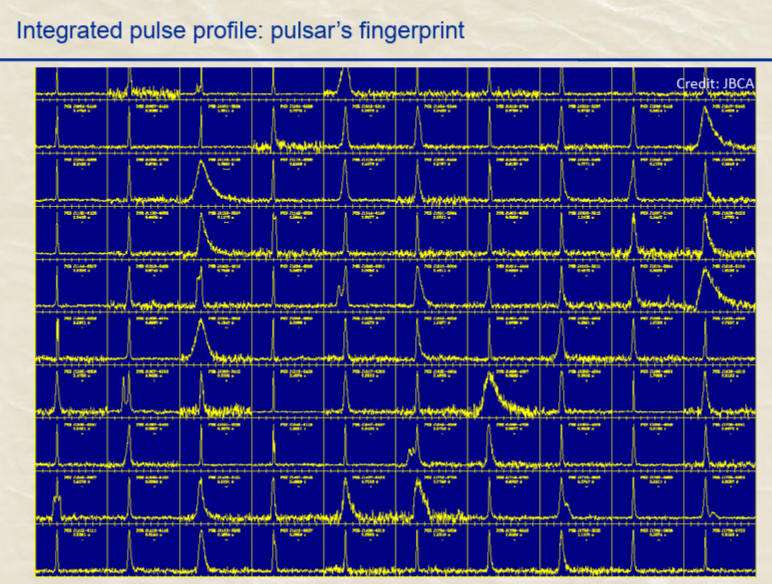

Пульсары - это космические объекты, излучающие в различных диапазонах длины волны. Согласно современным астрофизическим теориям, пульсары представляют собой вращающиеся нейтронные звезды, обладающие магнитным полем, наклоненным относительно оси вращения.

В используемом датасете есть как примеры ложных обнаружений, так и примеры реальных пульсаров, подтвержденные учеными. Данные получены в результате [The High Time Resolution Universe Pulsar Survey I](https://arxiv.org/abs/1006.5744).

<h1>Описание датасета</h1>
Сигнал от пульсаров представляет собой периодические импульсы.

Для описания объекта используется integrated profile (интегральный профиль) &mdash; агрегирование сигнала за разные периоды вращения (см. картинку выше). У всех пульсаров разные интегральные профили, и обычно эта характеристика мало меняется во времени.
В данном датасете интегральный профиль также усреднен по частоте.

Полный набор признаков датасета:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.

Целевая переменная:
9. Target class


В признаках встречается еще одна важная характеристика объекта: DM-SNR кривая. Подробнее о ней можно почитать <a target="_blank" href="https://arxiv.org/pdf/1005.5068.pdf#:~:text=period-DM%20diagram%3B%20good%20agreement,pulsars%20in%20their%20candidate%20plots.)">в специализированных материалах</a>.

Про коэффициенты эксцесса и асимметрии можно посмотреть <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0">здесь</a> и <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8">здесь</a>, формулы для выборочных коэффициентов асимметрии и эксцесса можно найти в английской версии этих статей.

<a target="_blank" href="https://arxiv.org/pdf/1603.05166.pdf">Статья</a> с подробным описанием процесса генерации данных.











## Биология: [датасет](https://www.kaggle.com/datasets/medelbachirkhellaf/anemia-easylevel) на  анемию и лабораторные тесты

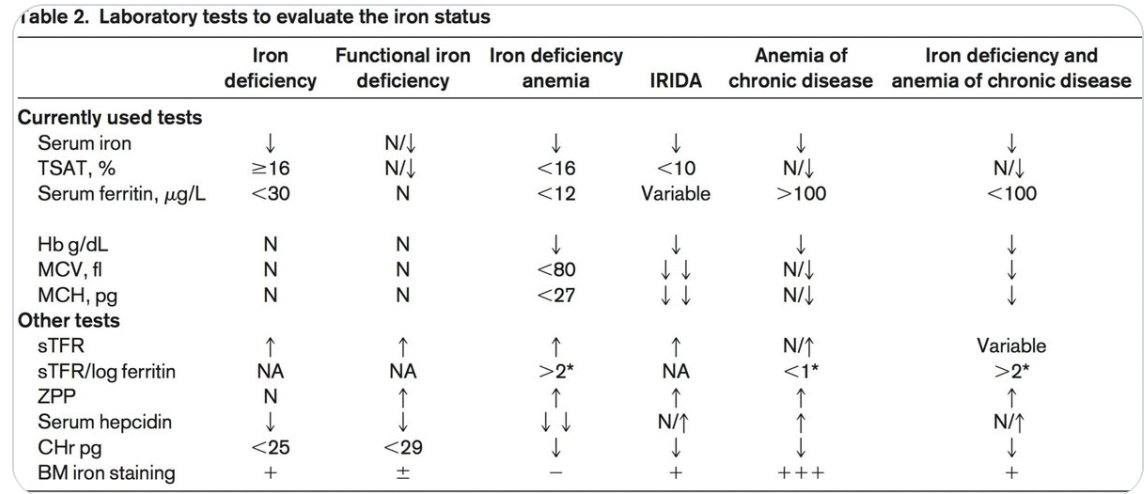  

Анемия — это состояние, при котором уровень гемоглобина в крови ниже нормы. Гемоглобин — это белок в эритроцитах, который переносит кислород из лёгких в ткани и органы. Анемия может быть вызвана различными причинами, включая дефицит железа, хронические заболевания, кровопотери или нарушения синтеза гемоглобина.

На изображении представлены лабораторные тесты, которые используются для оценки состояния железа и диагностики анемии. Вот краткое объяснение ключевых показателей:

### Ключевые показатели:

- **Serum iron (Сывороточное железо)**:
  - Низкий уровень указывает на дефицит железа.
  - Нормальные значения: Мужчины: 60–170 мкг/дл, Женщины: 50–170 мкг/дл.

- **TSAT (Transferrin Saturation, %)**:
  - Показывает, насколько насыщен трансферрин железом.
  - Низкий уровень (<16%) указывает на дефицит железа.

- **Serum ferritin (Сывороточный ферритин)**:
  - Показывает запасы железа в организме.
  - Низкий уровень (<30 мкг/л) указывает на дефицит железа.

### Примеры использования в таблице:

| Показатель                  | Описание                                                                 |
|-----------------------------|--------------------------------------------------------------------------|
| **Сывороточное железо (Serum iron)** | ↓ — снижено при железодефиците и железодефицитной анемии.              |
|                             | N↓↓ — может быть нормальным или значительно сниженным при функциональном дефиците железа. |
| **Ферритин (Serum ferritin)**       | <30 — снижен при железодефиците.                                        |
|                             | >100 — повышен при анемии хронических заболеваний.                    |
| **Гемоглобин (Hb)**         | ↓ — снижен при анемии.                                                  |
|                             | N — нормальный уровень, если анемия отсутствует.                        |
| **MCV (Mean Corpuscular Volume)**   | <80 — снижен (микроцитоз) при железодефицитной анемии.                 |
|                             | N — нормальный при отсутствии анемии.                                   |  


Подробнее с типами и их особенностями можно ознакомиться [тут](https://ashpublications.org/hematology/article/2015/1/8/20735/Iron-deficiency-new-insights-into-diagnosis-and)


<!DOCTYPE html>
<body>
    <h1>Описание датасета</h1>
    <p><p>
    <p>1. <strong>Hemoglobin</strong>: это белок в красных кровяных тельцах (эритроцитах), который отвечает за перенос кислорода из лёгких в ткани и органы, а также за возврат углекислого газа обратно в лёгкие.</p>
    <p>Нормальные значения:</p>
    <ul>
        <li>Мужчины: 13.8&mdash;17.2 г/дл</li>
        <li>Женщины: 12.1&mdash;15.1 г/дл</li>
    </ul>
    <p>2. <strong>MCH (Mean Corpuscular Hemoglobin)</strong>: показывает среднее количество гемоглобина в одном эритроците.</p>
    <p>3. <strong>MCHC (Mean Corpuscular Hemoglobin Concentration)</strong>: показывает среднюю концентрацию гемоглобина в единице объёма эритроцитов.</p>
    <p>4. <strong>MCV (Mean Corpuscular Volume)</strong>: показывает средний объём одного эритроцита.</p>
    <p>5. <strong>GENDER (Пол)</strong>: указывает пол пациента (мужской или женский). В данном датасете пол уже закодирован как 0 и 1.</p>
    <p>6. <strong>IDENTIFICATION (Идентификация)</strong>: уникальный идентификатор пациента, который указывает на наличие/отсутствие заболевания.</p>
    <p>Как можно заметить наши данные используются в классификации и выявлении различных типов анемии из реальной жизни.</p>
</body>
</html>


## 1. Загрузка датасета

Мы будем работать только с файлом `Test_Anemia.csv` или `pulsar_data_train.csv`.  

<details>
  <summary>Если загрузили .zip файл в среду</summary>
  Воспользуйтесь приведенной ниже командой, она достанет нужный файл в среду `/content/`

  !unzip `/content/archive.zip`
</details>

In [ ]:
data = pd.read_csv("<...>")

Посмотрим на вид датасета и на типы данных, содержащихся в нем

In [ ]:
data.head()

In [ ]:
data.info()

Выведите описательные статистики для каждого из классов и сделайте предварительный вывод о том, какие признаки лучше всего разделяют классы

In [ ]:
<..>.describe()

In [ ]:
<..>.describe()

**Ответ:**

## 2. Предобработка данных

Есть ли в полученом датасете пропуски исходя из информации в `data.info()`?  
 Более явную проверку на пропуски можно сделать при помощи следующего метода

In [ ]:
data.isna().sum()

Удалите все строчки с пропусками (если такие есть):

In [ ]:
<...>

Чтобы удобнее было работать с данными переведем все названия признаков в нижний регистр  

<details>
  <summary>Подсказка</summary>
  Можно воспользоваться методом `.lower()`
</details>

In [ ]:
data.columns = <...>

Разбейте наши данные на `features` $(X)$ &mdash; данные для обучения, и `target` $(Y)$ &mdash;предсказываемая переменная

Профиль биологии может использовать все столбцы, профиль физики - только те что указаны ниже:

In [ ]:
needed_columns = [' mean of the integrated profile',
       ' standard deviation of the integrated profile',
       ' skewness of the integrated profile', ' mean of the dm-snr curve',
       ' excess kurtosis of the dm-snr curve']  # Используем только эти столбцы для пульсаров

Определите целевой столбец, для дальнешего удобного использования:

In [ ]:
target = <...>

In [ ]:
X = <...>
y = <...>

## 3. Графики

Проведем визуальный анализ данных. Построим оценки плотности по каждому признаку отдельно для каждого класса.  
1. Какие признаки лучше всего разделяют классы?  
2. Как это отразится на результатах модели?


In [ ]:
# Определим количество признаков
num_features = len(X.columns)

# Определим количество строк и столбцов для subplot
num_cols = 3  # Количество столбцов
num_rows = (num_features + num_cols - 1) // num_cols  # Количество строк

# Создаем фигуру и сетку подграфиков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Плоский список осей для удобства итерации
axes = axes.flatten()

# Построение графиков плотности для каждого признака
for i, feature in enumerate(X.columns):
    sns.kdeplot(data=data, x=feature, hue=target, fill=True, ax=axes[i])
    axes[i].set_title(f'Распределение признака\n{feature} по классам')

# Удаляем лишние оси, если их больше, чем признаков
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Показываем графики
plt.tight_layout()
plt.show()

**Ответ:**

### Биология

Поскольку для признака gender распределение выглядит не очень информативно, визуализируем его с помощью `barplot`

In [ ]:
# Визуализация распределения признака 'gender' с помощью barplot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', hue=target)

# Добавляем заголовок и метки осей
plt.title('Распределение признака gender по классам')
plt.xlabel('Gender')
plt.ylabel('Count')

# Показываем график
plt.show()

Что можно сказать о распределении для признака `GENDER`?

**Ответ:**

### Физика

Поскольку для признака ` skewness of the integrated profile` распределение выглядит не очень информативно, визуализируем его более подробно с гистограммой и нанесением средних

In [ ]:
# Заполняем пропуски в вашем коде
plt.figure(figsize=(10, 6))

# Гистограмма для каждого класса
sns.histplot(data=data, x=' skewness of the integrated profile', hue=target, kde=True, bins=30, element='step', stat='density')

# Добавляем вертикальные линии для среднего значения каждого класса
for target_class in data[target].unique():
    mean_value = data[data[target] == target_class][' skewness of the integrated profile'].mean()
    plt.axvline(mean_value, color='orange' if target_class == 1 else 'blue', linestyle='--', label=f'Среднее класса {target_class}')

# Добавляем заголовок и метки осей
plt.title('Распределение признака skewness of the integrated profile по классам')
plt.xlabel('Skewness of the Integrated Profile')
plt.ylabel('Density')

# Отрегулируйте масштаб для лучшей визуализации класса 1
plt.ylim(<...>)

# Показываем график
plt.legend()
plt.show()


Что можно сказать о распределении для признака `skewness of the integrated profile`?

**Ответ:**

## 4. Разделим датасет и обучим модель

Создайте и обучите логистическую регрессию. Укажите `fit_intercept` &mdash; `True` и `penalty` &mdash; `None`.

In [ ]:
X_train, X_test, y_train, y_test = <...>

In [ ]:
model = <...>

Напечатайте коэффициенты модели. О чём говорят знаки `+` и `-`?

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

feature_names = X.columns  # Замените на ваши названия признаков
coef_df = pd.DataFrame(coefficients.T, index=feature_names, columns=['weights'])

# Добавляем свободный член в DataFrame
coef_df.loc['intercept'] = intercept

print(coef_df)

**Выводы:**

## 5. Проверим качество модели

Для  объектов из тестовой выборки оцените вероятность наличия анемии, при помощи метода [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Выведите эти значения, а также итоговые предсказания модели методом `predict`

In [ ]:
y_pred = <...>
probabilities = <...>
# Выводим вероятности и предсказания
results_df = pd.DataFrame({
    'Object': range(1, len(X_test) + 1),
    'Probability_Class_0': <...>,
    'Probability_Class_1': <...>,
    'Prediction': <...>
})

# Выводим DataFrame
results_df.head()

Теперь проверим качество нашей модели. Посчитайте его на тестовой выборке при помощи метрики Accuracy, показывающей долю правильных предсказаний:
$$
      Accuracy(Y, \widehat{Y}) = \frac{1}{n}\sum^{n}_{i = 1} I\{\widehat{Y}_{i} = Y_i\}
$$

In [ ]:
<...>

**Выводы:**